In [2]:
!pip3 install numpy
!pip3 install pandas
!pip3 install openpyxl
!pip3 install matplotlib
!pip3 install statsmodels
!pip3 install seaborn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.0 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 793.0 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import seaborn as sns 
sns.set_theme()

C:\Users\Raul\AppData\Local\Temp\ipykernel_86152\1715468902.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Parte Mafer

# Actividad 9.1. 
Elabore un resumen de máximo una cuartilla sobre la lectura de la sección de antecedentes en (INEI, 2002)

La desestacionalización está asociada a la idea de que una serie de tiempo está constituida por componentes no observables. La idea de componentes no observables surge con un análisis económico en el siglo XIX, especificamente en Francia, donde se creó un comité encargado de proponer métodos para separar las componentes de la serie, con el fin básico de pronosticarlos por separado.
Posteriormente, Estados Unidos trató de hacer lo mismo pero con la idea de construir un sistema de índices llamado "barómetro de proyección del ciclo económico". para apreciar las condiciones corrientes de la economía nacional y para el pronóstico de su desarrollo futuro.

En 19192 Warren M. Person, publicó un artículo sobre los métodos de estudio y de pronóstico de las condiciones económicas generales de los Estados Unidos. El método de Pearson consiste en dos partes: primero, aislar estadísticamente los cambios ocasionados por las fluctuaciones en las condiciones de los negocios. Segundo, elaboración de cierto número de índices que señalarían en qué fase del ciclo económico se encuentra la economía general en un momento dado y que facilitarían un pronóstico de su desarrollo futuro.

Los métodos para encontrar estos índices, determinar y aislar los procesos que reflejan el ciclo económico, se denominaron métodos de Harvard.
En esta metodología se señala que la mayoría de las series presentan cuatro tipos de variaciones: 1) Variaciones que presentan cierta tendencia general 2) Fluctuaciones cíclicas o de la situación económica que aproximadamente corresponden a los ciclos económicos generales; 3) Fluctuaciones estacionales, que aparecen en series de datos trimestrales o mensuales; y 4) Fluctuaciones irregulares.

El procedimiento empleado en la investigación de Harvard para obtener las fluctuaciones cíclicas como un componente representante de la influencia del ciclo económico general sobre la marcha de la economía es como sigue: Se aísla la tendencia de la serie cronológica, suponiendo que es el resultado de un complejo de causas que actúan sostenidamente en una dirección e inducen el crecimiento de la economía nacional. Si la serie es trimestral o mensual se hallan las fluctuaciones estacionales cuyas causas están ligadas con frecuencia, al movimiento de la tierra (cambios de temperatura, días más largos o más cortos), o a causas de carácter social y convencional, como la elevación de las ventas en períodos de vísperas de días festivos.
Una vez que la tendencia y las fluctuaciones estacionales se han aislado, se sustraen de la serie original.
Es necesario mencionar al respecto, que la Escuela de Harvard sostenía que un cierto conjunto de causas produce la tendencia, independientemente de otro conjunto de causas que inducen las variaciones cíclicas.
En el largo plazo, lo que determina el movimiento de la series son factores. Estos factores son los que caracterizan la componente permanente o la tendencia de la serie. Además las fluctuaciones de las series alrededor de su componente permanente se define como componente cíclica.

Actualmente se han desarrollado procedimientos sofisticados para descomponer una serie de tiempo, en particular efectuar la desestacionalización de la serie (X11 ARIMA, X12 ARIMA), así como, una importante experiencia en el tratamiento empírico de los ciclos, tratando de caracterizarlos y prever su dinámica a través de un conjunto de series económicas utilizadas como indicadores de los ciclos de los negocios, clasificados en indicadores conducentes, coincidentes y retrasados.

# Ejemplo 9.1.1. 
Traveler ́s Rest, Inc., administra cuatro hoteles y están interesados en un modelo de pronóstico a corto plazo (un año) para la cantidad de habitaciones ocupadas en dichos hoteles, a efecto de decidir la contratación de empleados extra para el verano, así como presupuestos para publicidad y compra de materiales que tardan mucho en ser entregados. La tabla 9-1 muestra los datos disponibles de 14 años (el año 15 se utilizó como validación del modelo); dado que se desean pronósticos mensuales, se promediaron las observaciones de un mes entre el número de días del mes. Grafique los datos, identifique si existe algún tipo de patrón estacional y, si es necesario, aplique una transformación de potencia para lograr una fluctuación estacional constante.


## Carga de datos

In [33]:

df = pd.read_excel("/Users/maferpazaran/Downloads/Hab.xlsx")
df.head()

,t,Yt
0,1,501
1,2,488
2,3,504
3,4,578
4,5,545


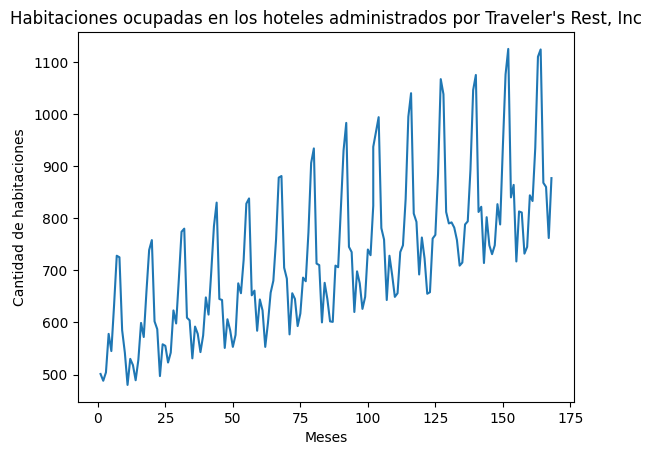

In [35]:
plt.plot(df['t'],df['Yt'])
plt.title("Habitaciones ocupadas en los hoteles administrados por Traveler's Rest, Inc")
plt.xlabel("Meses")
plt.ylabel("Cantidad de habitaciones")
plt.show()

Podemos observar que la gráfica de nuestra serie de tiempo, presenta tendencia creciente, por lo que la media no es constante.
Dicho esto, procederemos a identificar si nuestra serie tiene algún tipo de patrón estacional, esto lo haremos mediante la ACF y la PACF.

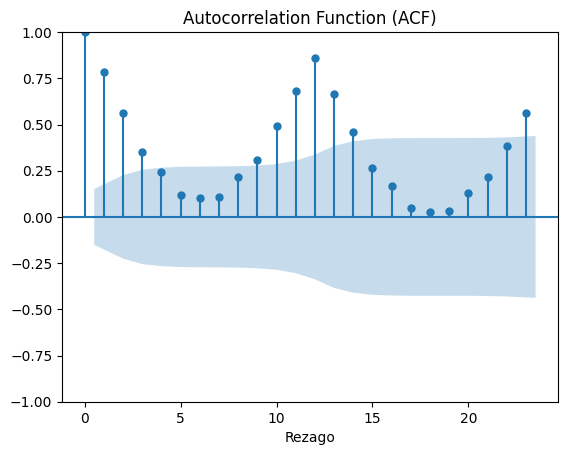

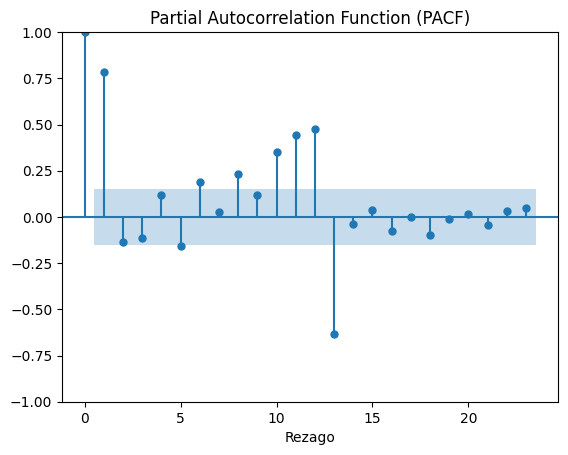

In [41]:
plot_acf(df['Yt'])
plt.title('Autocorrelation Function (ACF)')
plt.xlabel("Rezago")
plt.show()

plot_pacf(df['Yt'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel("Rezago")
plt.show()

Como podemos observar en las gráficas de la ACF y la PACF, tenemos barras significativas que se repiten en intervalos regulares, es decir, nos indican que ciertos patrones o ciclos se repiten en la serie temporal, lo que es característico de la estacionalidad. Por lo que podemos concluir que si existe algún tipo de patrón estacional.

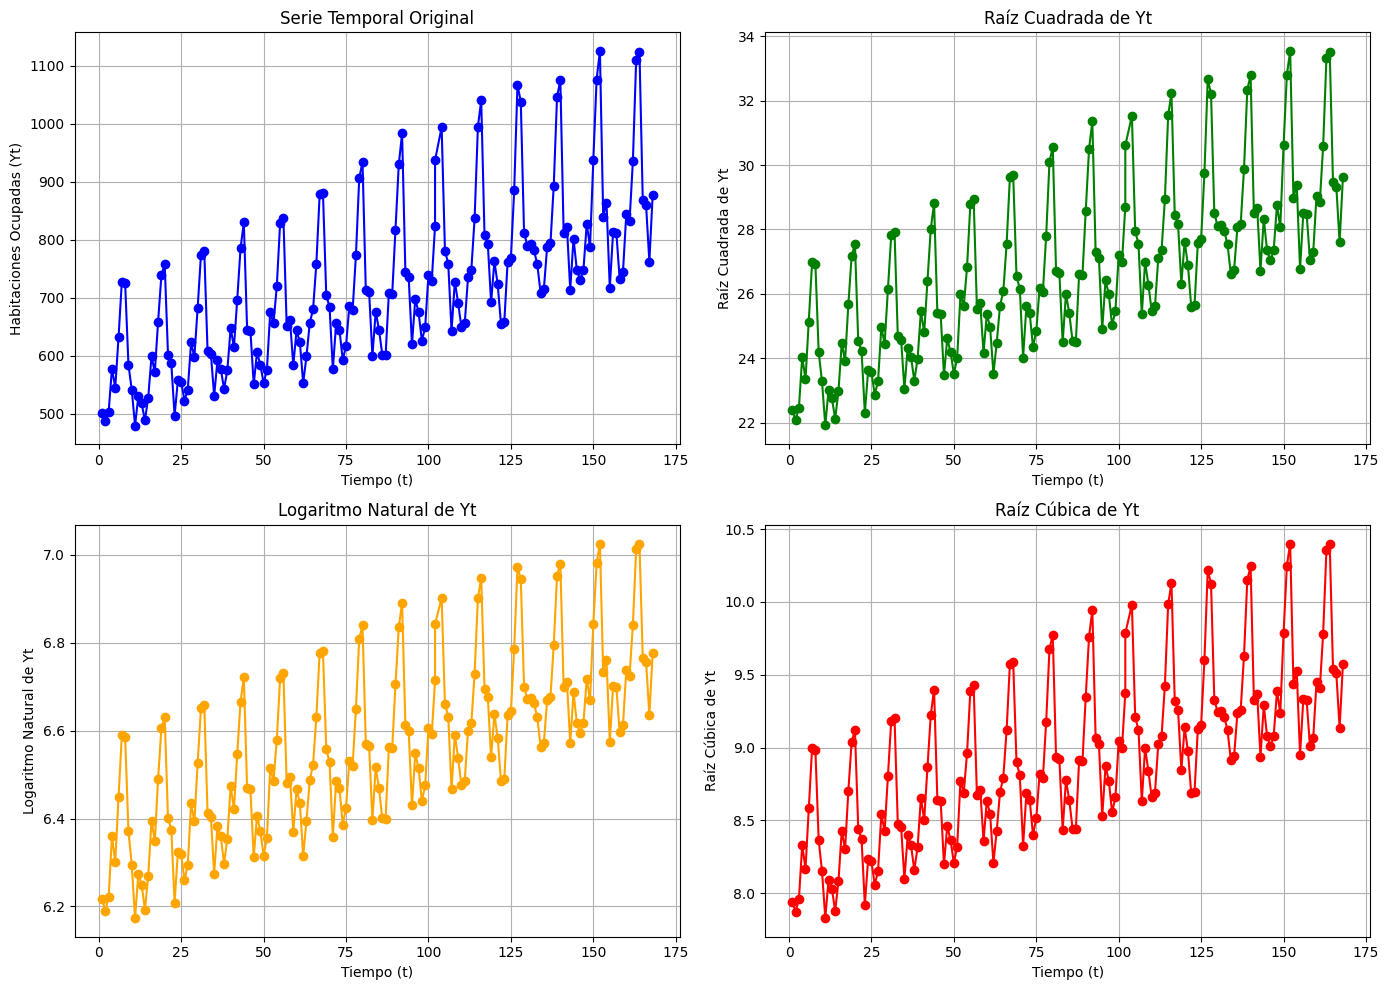

In [42]:
# Aplicar transformación de raíz cuadrada
df['sqrt_Yt'] = np.sqrt(df['Yt'])

# Aplicar transformación de logaritmo natural
df['log_Yt'] = np.log(df['Yt'])

# Aplicar transformación de raíz cúbica
df['cbrt_Yt'] = np.cbrt(df['Yt'])

# Graficar las transformaciones
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df['t'], df['Yt'], marker='o', color='blue')
plt.title('Serie Temporal Original')
plt.xlabel('Tiempo (t)')
plt.ylabel('Habitaciones Ocupadas (Yt)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(df['t'], df['sqrt_Yt'], marker='o', color='green')
plt.title('Raíz Cuadrada de Yt')
plt.xlabel('Tiempo (t)')
plt.ylabel('Raíz Cuadrada de Yt')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(df['t'], df['log_Yt'], marker='o', color='orange')
plt.title('Logaritmo Natural de Yt')
plt.xlabel('Tiempo (t)')
plt.ylabel('Logaritmo Natural de Yt')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(df['t'], df['cbrt_Yt'], marker='o', color='red')
plt.title('Raíz Cúbica de Yt')
plt.xlabel('Tiempo (t)')
plt.ylabel('Raíz Cúbica de Yt')
plt.grid(True)

plt.tight_layout()
plt.show()


## Parte Raúl

# Articividad 9.4
#### Resuelva los problemas 1-20 propuestos al final del capítulo referido en el numeral anterior (últimos cinco).

##### 16.- Para el mes de diciembre, están dados los siguientes índices estacionales específicos:

$$
75.4, 86.8, 96.9, 72.6, 80.0, 85.4
$$
 
Si el ajuste es de 1.05 y se emplea el método modificado de la media y si la tendencia esperada para diciembre es de $900 ¿Cuál es el pronóstico de diciembre?

Eliminamos el valor más alto y el más bajo, promediamos los demás:

In [4]:
indices = [86.8,96.9,72.6,80.0]
mediaM = sum(indices)/4
mediaAj = mediaM*1.05
print(f'Media modificada para diciembre: {mediaM}')
print(f'Media de índice estacional ajutada: {mediaAj}')

Media modificada para diciembre: 84.075
Media de índice estacional ajutada: 88.27875


Para obtener el pronóstico multiplicamos la tendencia esperada por la media ajustada y dividimos entre la media modificada:

In [5]:
print(f"Pronóstico: {(900*mediaAj)/mediaM}")

Pronóstico: 945.0


##### 17.- Un hotel de veraneo cerca de Portland, Maine, ha estado registrando por varios años sus ventas mensuales, aunque nunca ha analizado estos datos. El hotel calcula los Indices estacionales para sus ventas mensuales. ¿Cuáles de las siguientes declaraciones sobre el Indice son correctas?


    a) La suma de los 12 números índices mensuales debe ser 1,200.

    b) Un Indice de 85 en mayo indica que las ventas son menores en un 15% del promedio de las ventas mensuales.

    c) Un Indice de 130 en enero indica que las ventas están 30% por arriba del promedio mensual de ventas.

    d) El índice de cualquier mes debe estar entre cero y 200.

    e) El índice promedio para cada uno de los 12 meses debería ser 100.